In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import scipy.linalg as linalg
import numpy as np
import scipy as scp


In [3]:
def solve_eq(vec, pars):
  dvec= pars@vec.T
  return dvec

def solve_eq_backwards(vec, pars, dt):
  A= (np.eye(pars.shape[0]))- dt*pars
  A_inv= np.linalg.inv(A)
  dvec= A_inv@pars@vec
  return dvec

def generate_true(xin, time, pars):
  frhs = xin*0.0
  store_vec= []
  
  vec= xin
  for t in range(1, len(time)):
    store_vec.append(vec)
    dvec= pars@vec.T
    dt= time[t]-time[t-1]
    
    print(np.array(dt*dvec)[0]); print(type(dt*dvec))
    vec= vec + np.array(dt*dvec)[0]
  store_vec.append(vec)

  return np.array(store_vec)

def lotka_volterra_forward(xin, time, pars, K, y_obs, H):
  frhs = xin*0.0
  store_vec= []
  # a, b, d, g = pars
  # x, y = xin
  vec= xin
  for t in range(1, len(time)):
    store_vec.append(vec)
    gain_vec= K*(y_obs[t].T- H@vec.T)
    dvec= solve_eq(vec, pars) + gain_vec
    dt= time[t]-time[t-1]
    # print(dt*dvec)
    vec= vec + np.array(dt*dvec)[0]
  store_vec.append(vec)

  return np.array(store_vec)

def lotka_volterra_backward(x_tilda, time, pars, K_prime, y_obs, H):

  store_vec= []
  vec= x_tilda.copy()
  
  for t in range(len(time)-1, 0, -1):
    store_vec.append(vec)
    gain_vec= K_prime*(y_obs[t].T- H@vec.T)
    dt= time[t]-time[t-1]
    dvec= solve_eq_backwards(vec, pars, dt) - gain_vec
  
    # print(dt*dvec)
    vec= vec - np.array(dt*dvec)[0]
  store_vec.append(vec)

  return np.flip(store_vec, axis=0)


def back_forth_nudge(pars, t, K, K_back, H, y_obs, number_of_iterations): #once
  store_backward, store_forward=[], []
  #tilta, normal
  xin= np.mean(y_obs, axis=0)
  nudge= lotka_volterra_forward(xin, t, pars, 0.2, y_obs, H)
  store_forward.append(nudge)
  for it in range(number_of_iterations):
    nudge_back= lotka_volterra_backward(nudge[-1], t, pars, K_back, y_obs, H)
    nudge= lotka_volterra_forward(nudge_back[0], t, pars, K, y_obs, H)
    store_backward.append(nudge_back)
    store_forward.append(nudge)
  return store_forward, store_backward


In [23]:

t = np.linspace(0,2,100)
xin= np.array([1.,1.])
pars= np.matrix([[2.,0.],[0.,1.]])
H= np.eye(2)*2

cov_obs= np.array([[1.,1.],[0.,1.]])
r = 1

xtrue= generate_true(xin, t, pars)
y_obs= xtrue*0.0
for i in range(len(t)):
    y_obs[i] = H.dot(xtrue[i]) + np.random.multivariate_normal(mean= [0,0], cov= cov_obs)
    


[0.04040404 0.02020202]
<class 'numpy.matrix'>
[0.04203653 0.02061014]
<class 'numpy.matrix'>
[0.04373497 0.02102651]
<class 'numpy.matrix'>
[0.04550204 0.02145129]
<class 'numpy.matrix'>
[0.04734051 0.02188465]
<class 'numpy.matrix'>
[0.04925326 0.02232676]
<class 'numpy.matrix'>
[0.05124329 0.02277781]
<class 'numpy.matrix'>
[0.05331372 0.02323796]
<class 'numpy.matrix'>
[0.05546781 0.02370742]
<class 'numpy.matrix'>
[0.05770894 0.02418635]
<class 'numpy.matrix'>
[0.06004061 0.02467497]
<class 'numpy.matrix'>
[0.06246649 0.02517345]
<class 'numpy.matrix'>
[0.06499039 0.02568201]
<class 'numpy.matrix'>
[0.06761627 0.02620083]
<class 'numpy.matrix'>
[0.07034824 0.02673014]
<class 'numpy.matrix'>
[0.07319059 0.02727015]
<class 'numpy.matrix'>
[0.07614779 0.02782106]
<class 'numpy.matrix'>
[0.07922446 0.0283831 ]
<class 'numpy.matrix'>
[0.08242545 0.0289565 ]
<class 'numpy.matrix'>
[0.08575577 0.02954148]
<class 'numpy.matrix'>
[0.08922065 0.03013827]
<class 'numpy.matrix'>
[0.09282553 0

C:\Users\adity\AppData\Local\Temp\ipykernel_3520\179374111.py:12: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  y_obs[i] = H.dot(xtrue[i]) + np.random.multivariate_normal(mean= [0,0], cov= cov_obs)


In [26]:
K, K_back= 1,1
store_for, store_back=  back_forth_nudge(pars, t, K, K_back, H, y_obs, 1000)

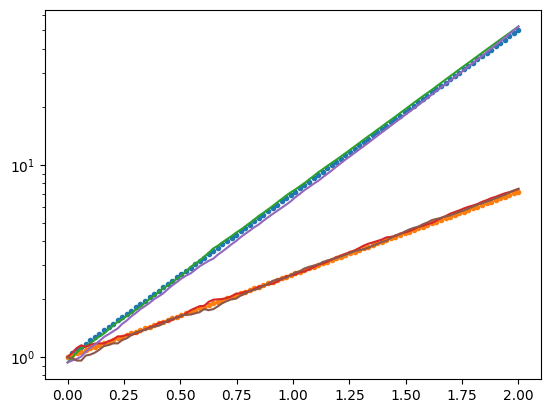

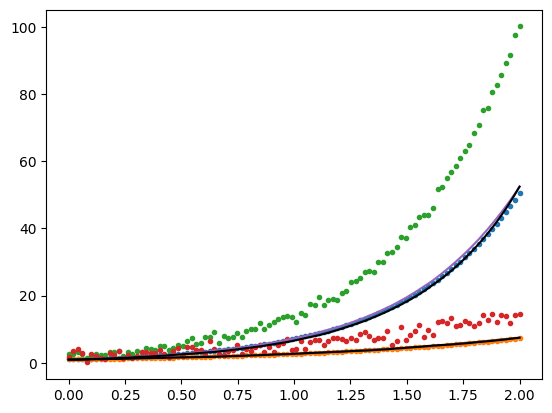

In [27]:
plt.semilogy(t, xtrue, '.')
# plt.semilogy(t, y_obs, '.')
# for it in range(len(store_back)):
#     plt.semilogy(t, store_for[it])
#     plt.semilogy(t, store_back[it])

plt.semilogy(t, store_for[-1])
plt.semilogy(t, store_back[-1])

plt.show()

plt.plot(t, xtrue, '.')
plt.plot(t, y_obs, '.')
plt.plot(t, store_for[-1], label="forward")
plt.plot(t,store_back[-1], label="back", color="black")

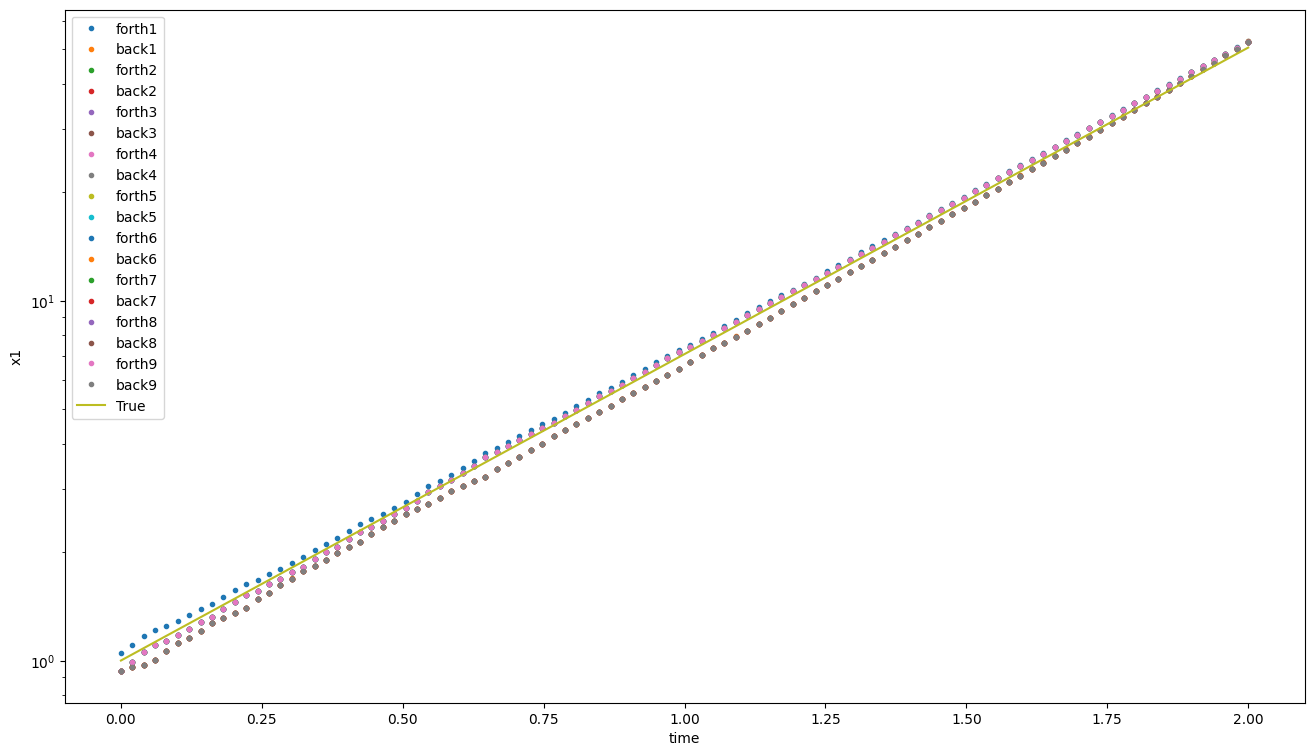

In [29]:
plt.figure(figsize=(16,9))
for it in range(1,10):
    plt.semilogy(t, store_for[it][:,0], ".", label= f"forth{it}")
    plt.semilogy(t, store_back[it][:,0], ".", label= f"back{it}")
plt.semilogy(t, xtrue[:,0], "-", label="True")
plt.xlabel("time"); plt.ylabel("x1")

plt.legend()

[0.10275374 0.03443865]
<class 'numpy.matrix'>
[0.1069054  0.03513438]
<class 'numpy.matrix'>
[0.11122481 0.03584417]
<class 'numpy.matrix'>
[0.11571874 0.03656829]
<class 'numpy.matrix'>
[0.12039425 0.03730705]
<class 'numpy.matrix'>
[0.12525866 0.03806072]
<class 'numpy.matrix'>
[0.13031962 0.03882963]
<class 'numpy.matrix'>
[0.13558506 0.03961406]
<class 'numpy.matrix'>
[0.14106324 0.04041435]
<class 'numpy.matrix'>
[0.14676277 0.0412308 ]
<class 'numpy.matrix'>
[0.15269258 0.04206375]
<class 'numpy.matrix'>
[0.15886197 0.04291352]
<class 'numpy.matrix'>
[0.16528064 0.04378046]
<class 'numpy.matrix'>
[0.17195864 0.04466491]
<class 'numpy.matrix'>
[0.17890647 0.04556723]
<class 'numpy.matrix'>
[0.18613501 0.04648778]
<class 'numpy.matrix'>
[0.19365562 0.04742693]
<class 'numpy.matrix'>
[0.20148009 0.04838505]
<class 'numpy.matrix'>
[0.2096207  0.04936253]
<class 'numpy.matrix'>
[0.21809022 0.05035975]
<class 'numpy.matrix'>
[0.22690195 0.05137712]
<class 'numpy.matrix'>
[0.2360697  0

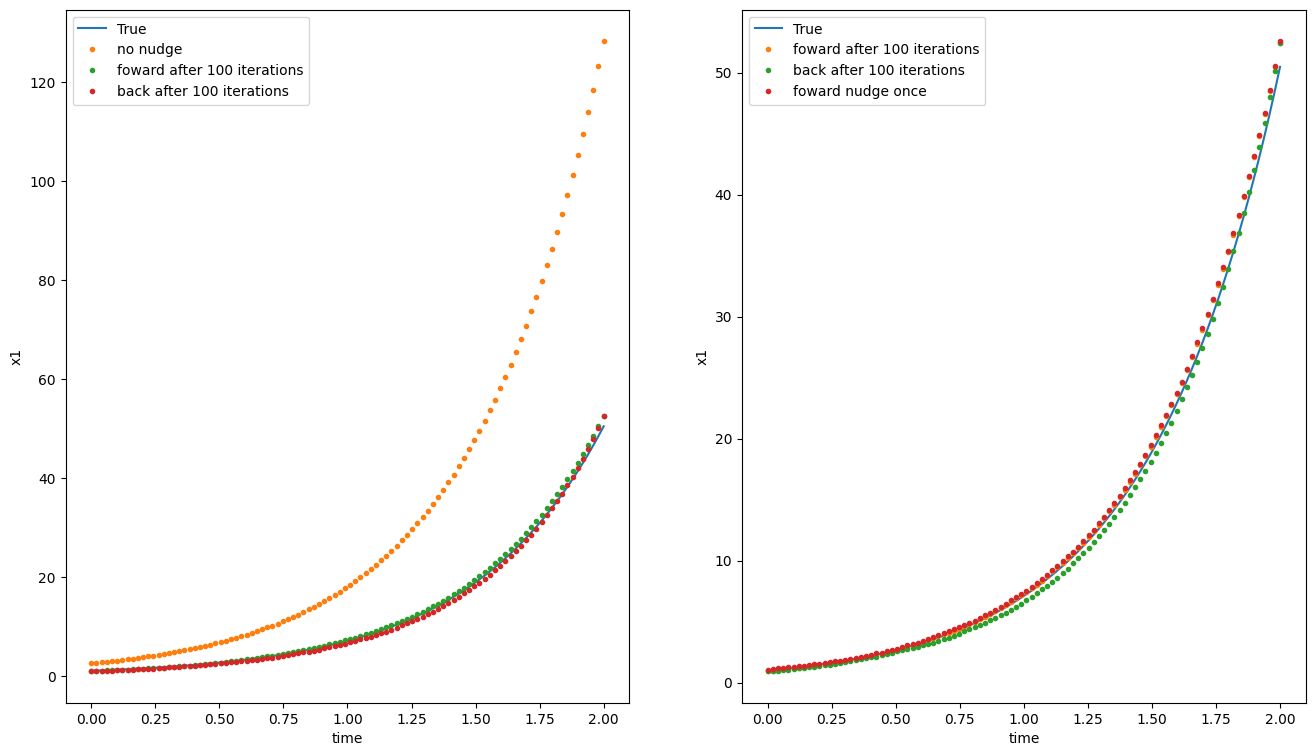

In [30]:
x_nonudge= generate_true(y_obs[0], t, pars)
plt.figure(figsize=(16,9))
# for it in range(5):
plt.subplot(1,2,1)
it=-1
plt.plot(t, xtrue[:,0], "-", label="True")
plt.plot(t, x_nonudge[:,0], ".", label="no nudge")
plt.plot(t, store_for[it][:,0], ".", label= f"foward after 100 iterations")
plt.plot(t, store_back[it][:,0], ".", label= f"back after 100 iterations")

# plt.plot(t, store_for[1][:,0], ".", label= f"foward nudge once")
plt.xlabel("time"); plt.ylabel("x1")

plt.legend()

plt.subplot(1,2,2)
it=-1
plt.plot(t, xtrue[:,0], "-", label="True")
# plt.plot(t, x_nonudge[:,0], ".", label="no nudge")
plt.plot(t, store_for[it][:,0], ".", label= f"foward after 100 iterations")
plt.plot(t, store_back[it][:,0], ".", label= f"back after 100 iterations")

plt.plot(t, store_for[1][:,0], ".", label= f"foward nudge once")
plt.xlabel("time"); plt.ylabel("x1")

plt.legend()

[0.1119258  0.07327076]
<class 'numpy.matrix'>
[0.11644805 0.07475097]
<class 'numpy.matrix'>
[0.12115302 0.07626109]
<class 'numpy.matrix'>
[0.12604809 0.07780172]
<class 'numpy.matrix'>
[0.13114095 0.07937347]
<class 'numpy.matrix'>
[0.13643957 0.08097698]
<class 'numpy.matrix'>
[0.14195228 0.08261288]
<class 'numpy.matrix'>
[0.14768773 0.08428183]
<class 'numpy.matrix'>
[0.15365491 0.08598449]
<class 'numpy.matrix'>
[0.15986319 0.08772155]
<class 'numpy.matrix'>
[0.16632231 0.0894937 ]
<class 'numpy.matrix'>
[0.1730424  0.09130165]
<class 'numpy.matrix'>
[0.18003401 0.09314613]
<class 'numpy.matrix'>
[0.18730811 0.09502787]
<class 'numpy.matrix'>
[0.19487612 0.09694763]
<class 'numpy.matrix'>
[0.2027499  0.09890617]
<class 'numpy.matrix'>
[0.21094181 0.10090427]
<class 'numpy.matrix'>
[0.21946472 0.10294274]
<class 'numpy.matrix'>
[0.22833198 0.10502239]
<class 'numpy.matrix'>
[0.23755751 0.10714406]
<class 'numpy.matrix'>
[0.2471558  0.10930858]
<class 'numpy.matrix'>
[0.25714189 0

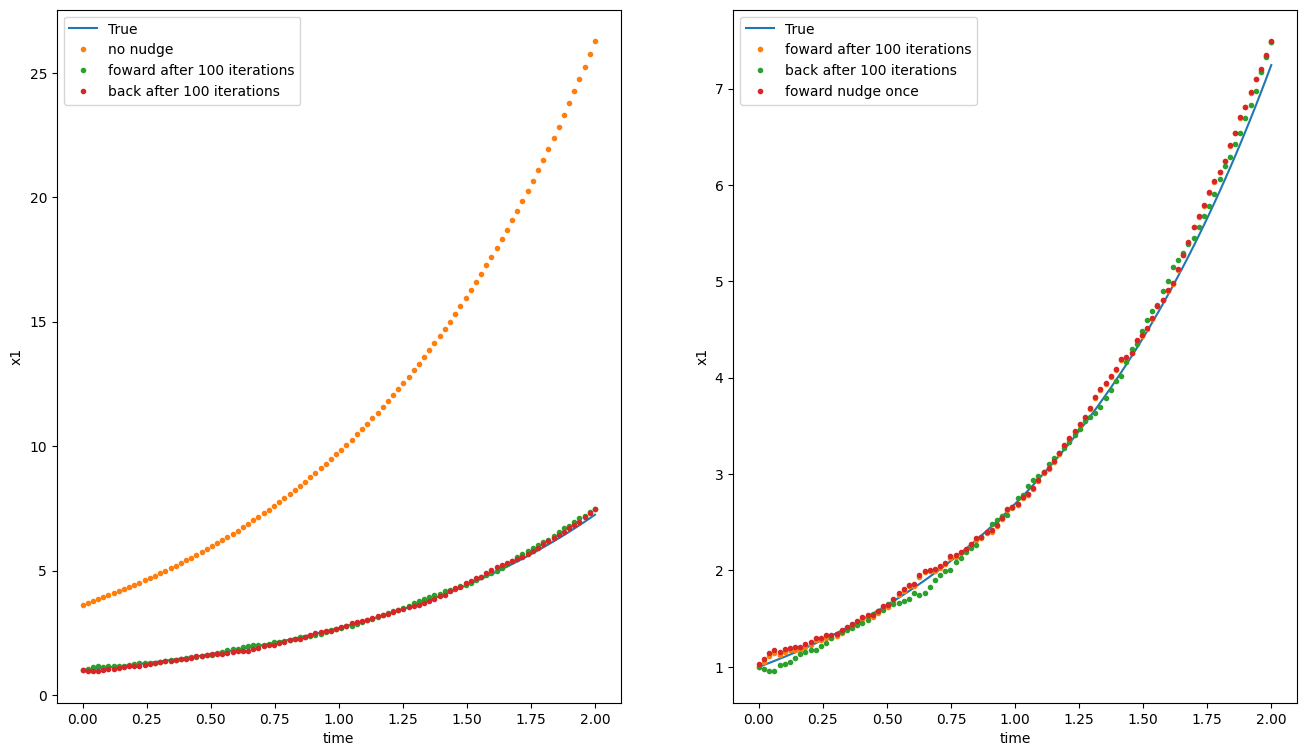

In [31]:
x_nonudge= generate_true(y_obs[1], t, pars)
plt.figure(figsize=(16,9))
# for it in range(5):
plt.subplot(1,2,1)
it=-1
plt.plot(t, xtrue[:,1], "-", label="True")
plt.plot(t, x_nonudge[:,1], ".", label="no nudge")
plt.plot(t, store_for[it][:,1], ".", label= f"foward after 100 iterations")
plt.plot(t, store_back[it][:,1], ".", label= f"back after 100 iterations")

# plt.plot(t, store_for[1][:,0], ".", label= f"foward nudge once")
plt.xlabel("time"); plt.ylabel("x1")

plt.legend()

plt.subplot(1,2,2)
it=-1
plt.plot(t, xtrue[:,1], "-", label="True")
# plt.plot(t, x_nonudge[:,0], ".", label="no nudge")
plt.plot(t, store_for[it][:,1], ".", label= f"foward after 100 iterations")
plt.plot(t, store_back[it][:,1], ".", label= f"back after 100 iterations")

plt.plot(t, store_for[1][:,1], ".", label= f"foward nudge once")
plt.xlabel("time"); plt.ylabel("x1")

plt.legend()

In [38]:
def rmse(x, y):
    return np.sqrt(np.mean(np.square(x-y)))

def given_true_traj_rmse(xtraj, xtrue):
    
    rmse_x=rmse(xtraj[:,0], xtrue[:,0])
    rmse_y=rmse(xtraj[:,1], xtrue[:,1])
    
    
    rmse_v= np.array([rmse_x, rmse_y])
    return rmse_v

def given_true_traj_rmse_t(xtraj, xtrue):
    rmse_t=[]
    for i in range(len(xtraj)):
        rmse_v= rmse(xtraj, xtrue)
        rmse_t.append(rmse_v)
    return rmse_t

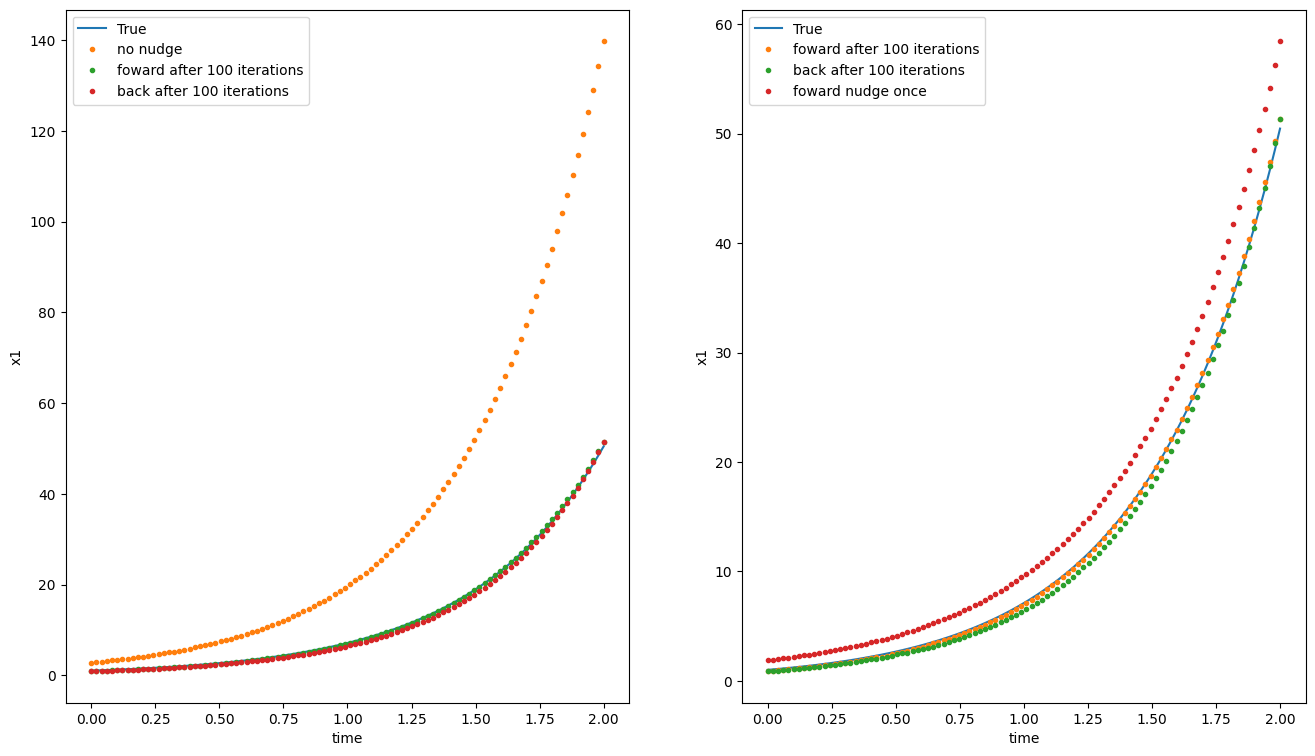

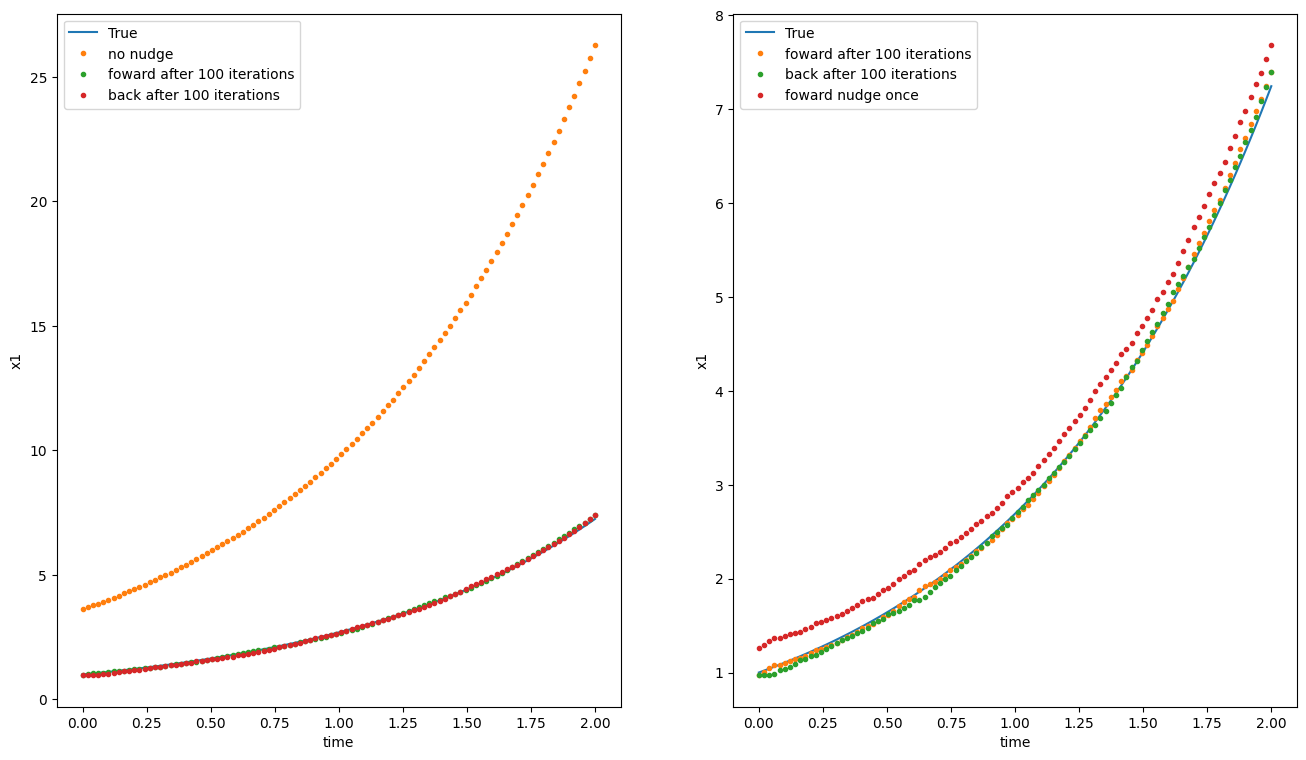

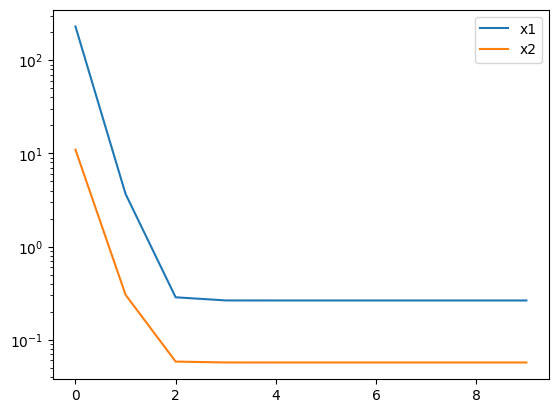

In [48]:
K, K_back= 0.5,0.5
store_for, store_back=  back_forth_nudge(pars, t, K, K_back, H, y_obs, 1000)
plt.figure(figsize=(16,9))
# for it in range(5):
plt.subplot(1,2,1)
it=-1
plt.plot(t, xtrue[:,0], "-", label="True")
plt.plot(t, x_nonudge[:,0], ".", label="no nudge")
plt.plot(t, store_for[it][:,0], ".", label= f"foward after 100 iterations")
plt.plot(t, store_back[it][:,0], ".", label= f"back after 100 iterations")

# plt.plot(t, store_for[1][:,0], ".", label= f"foward nudge once")
plt.xlabel("time"); plt.ylabel("x1")

plt.legend()

plt.subplot(1,2,2)
it=-1
plt.plot(t, xtrue[:,0], "-", label="True")
# plt.plot(t, x_nonudge[:,0], ".", label="no nudge")
plt.plot(t, store_for[it][:,0], ".", label= f"foward after 100 iterations")
plt.plot(t, store_back[it][:,0], ".", label= f"back after 100 iterations")

plt.plot(t, store_for[1][:,0], ".", label= f"foward nudge once")
plt.xlabel("time"); plt.ylabel("x1")

plt.legend()
plt.show()

plt.figure(figsize=(16,9))
# for it in range(5):
plt.subplot(1,2,1)
it=-1
plt.plot(t, xtrue[:,1], "-", label="True")
plt.plot(t, x_nonudge[:,1], ".", label="no nudge")
plt.plot(t, store_for[it][:,1], ".", label= f"foward after 100 iterations")
plt.plot(t, store_back[it][:,1], ".", label= f"back after 100 iterations")

# plt.plot(t, store_for[1][:,0], ".", label= f"foward nudge once")
plt.xlabel("time"); plt.ylabel("x1")

plt.legend()

plt.subplot(1,2,2)
it=-1
plt.plot(t, xtrue[:,1], "-", label="True")
# plt.plot(t, x_nonudge[:,0], ".", label="no nudge")
plt.plot(t, store_for[it][:,1], ".", label= f"foward after 100 iterations")
plt.plot(t, store_back[it][:,1], ".", label= f"back after 100 iterations")

plt.plot(t, store_for[1][:,1], ".", label= f"foward nudge once")
plt.xlabel("time"); plt.ylabel("x1")

plt.legend()
plt.show()

rmse_iter= np.array([given_true_traj_rmse(traj[:], xtrue[:]) for traj in store_for])
plt.semilogy(rmse_iter[:,0][0:10], label="x1")
plt.semilogy(rmse_iter[:,1][0:10], label="x2")
plt.legend()


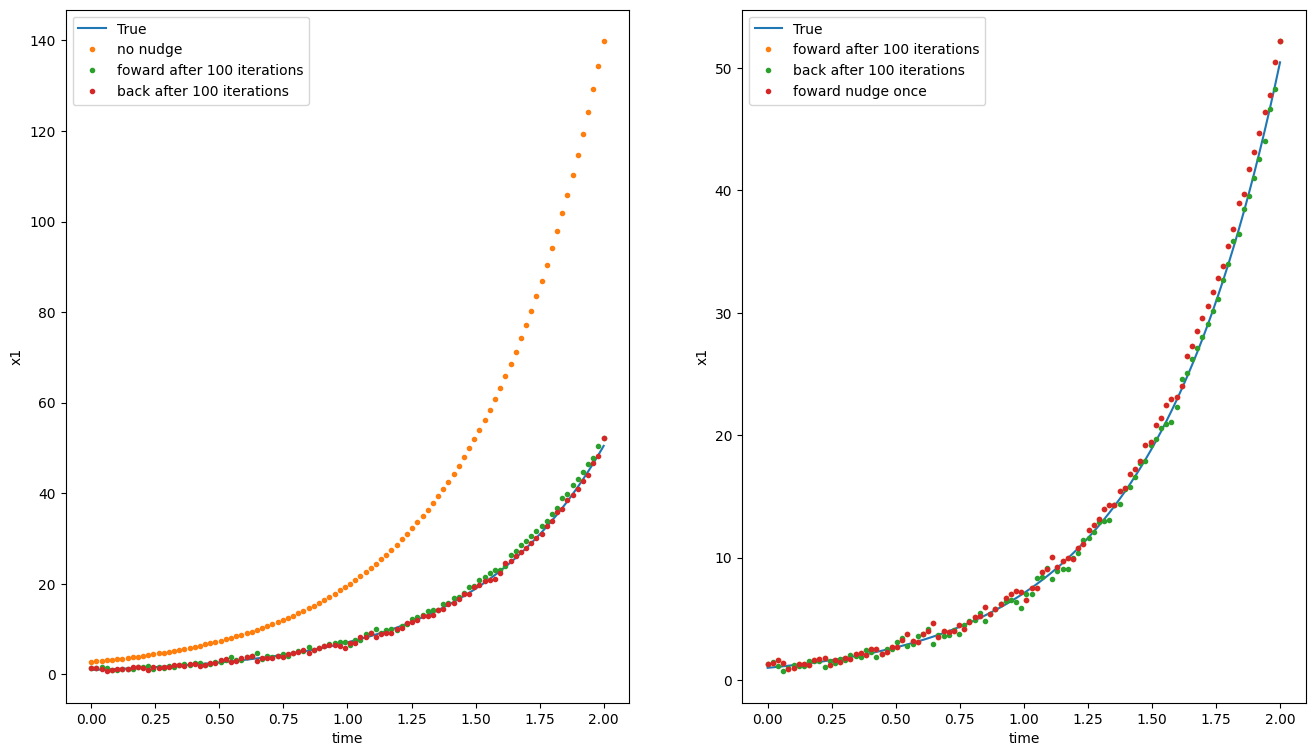

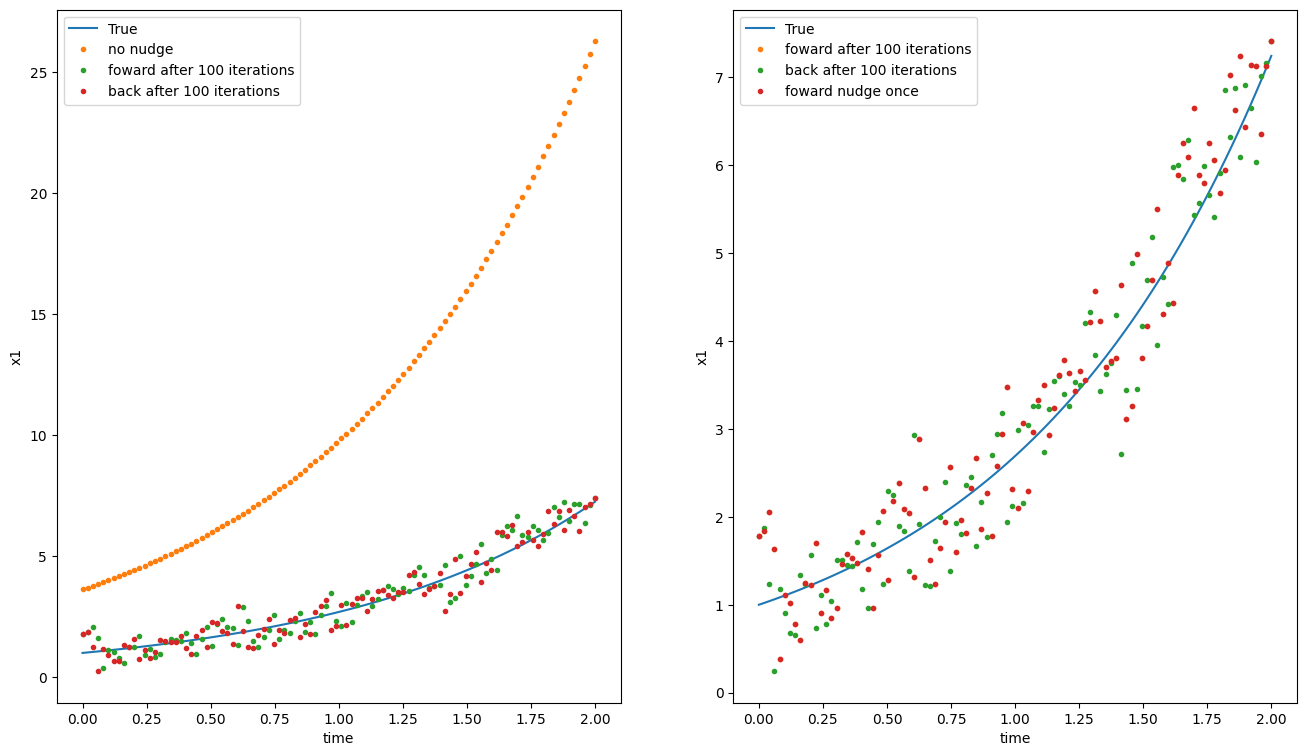

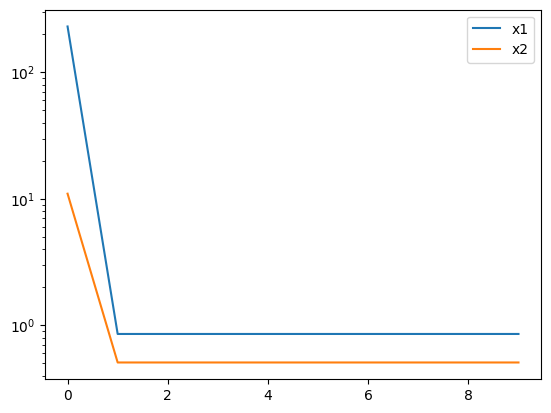

In [47]:
K, K_back= 20,20
store_for, store_back=  back_forth_nudge(pars, t, K, K_back, H, y_obs, 1000)
plt.figure(figsize=(16,9))
# for it in range(5):
plt.subplot(1,2,1)
it=-1
plt.plot(t, xtrue[:,0], "-", label="True")
plt.plot(t, x_nonudge[:,0], ".", label="no nudge")
plt.plot(t, store_for[it][:,0], ".", label= f"foward after 100 iterations")
plt.plot(t, store_back[it][:,0], ".", label= f"back after 100 iterations")

# plt.plot(t, store_for[1][:,0], ".", label= f"foward nudge once")
plt.xlabel("time"); plt.ylabel("x1")

plt.legend()

plt.subplot(1,2,2)
it=-1
plt.plot(t, xtrue[:,0], "-", label="True")
# plt.plot(t, x_nonudge[:,0], ".", label="no nudge")
plt.plot(t, store_for[it][:,0], ".", label= f"foward after 100 iterations")
plt.plot(t, store_back[it][:,0], ".", label= f"back after 100 iterations")

plt.plot(t, store_for[1][:,0], ".", label= f"foward nudge once")
plt.xlabel("time"); plt.ylabel("x1")

plt.legend()
plt.show()

plt.figure(figsize=(16,9))
# for it in range(5):
plt.subplot(1,2,1)
it=-1
plt.plot(t, xtrue[:,1], "-", label="True")
plt.plot(t, x_nonudge[:,1], ".", label="no nudge")
plt.plot(t, store_for[it][:,1], ".", label= f"foward after 100 iterations")
plt.plot(t, store_back[it][:,1], ".", label= f"back after 100 iterations")

# plt.plot(t, store_for[1][:,0], ".", label= f"foward nudge once")
plt.xlabel("time"); plt.ylabel("x1")

plt.legend()

plt.subplot(1,2,2)
it=-1
plt.plot(t, xtrue[:,1], "-", label="True")
# plt.plot(t, x_nonudge[:,0], ".", label="no nudge")
plt.plot(t, store_for[it][:,1], ".", label= f"foward after 100 iterations")
plt.plot(t, store_back[it][:,1], ".", label= f"back after 100 iterations")

plt.plot(t, store_for[1][:,1], ".", label= f"foward nudge once")
plt.xlabel("time"); plt.ylabel("x1")

plt.legend()
plt.show()

rmse_iter= np.array([given_true_traj_rmse(traj[:], xtrue[:]) for traj in store_for])
plt.semilogy(rmse_iter[:,0][0:10], label="x1")
plt.semilogy(rmse_iter[:,1][0:10], label="x2")
plt.legend()

In [10]:
K, K_back= 0.9,0.9
store_for, store_back=  back_forth_nudge(pars, t, K, K_back, H, y_obs, 1000)

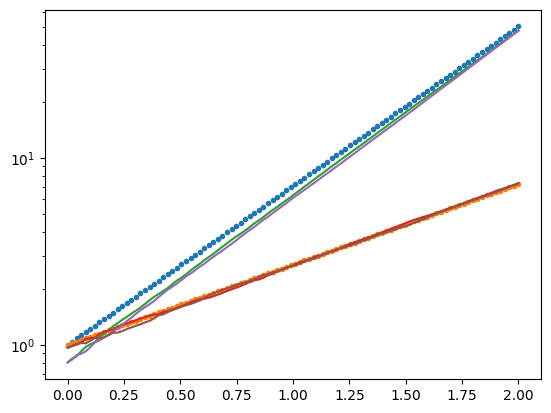

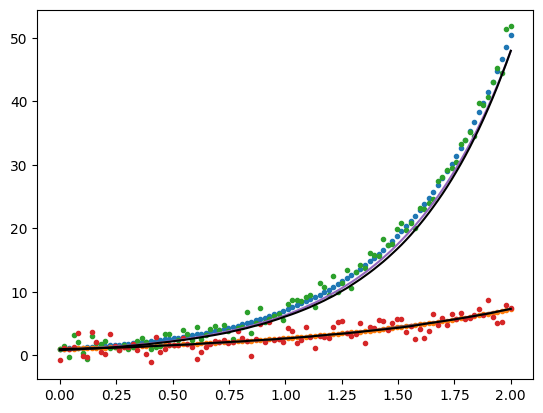

In [15]:
plt.semilogy(t, xtrue, '.')
# plt.semilogy(t, y_obs, '.')
# for it in range(len(store_back)):
#     plt.semilogy(t, store_for[it])
#     plt.semilogy(t, store_back[it])

plt.semilogy(t, store_for[-1])
plt.semilogy(t, store_back[-1])

plt.show()

plt.plot(t, xtrue, '.')
plt.plot(t, y_obs, '.')
plt.plot(t, store_for[-1], label="forward")
plt.plot(t,store_back[-1], label="back", color="black")

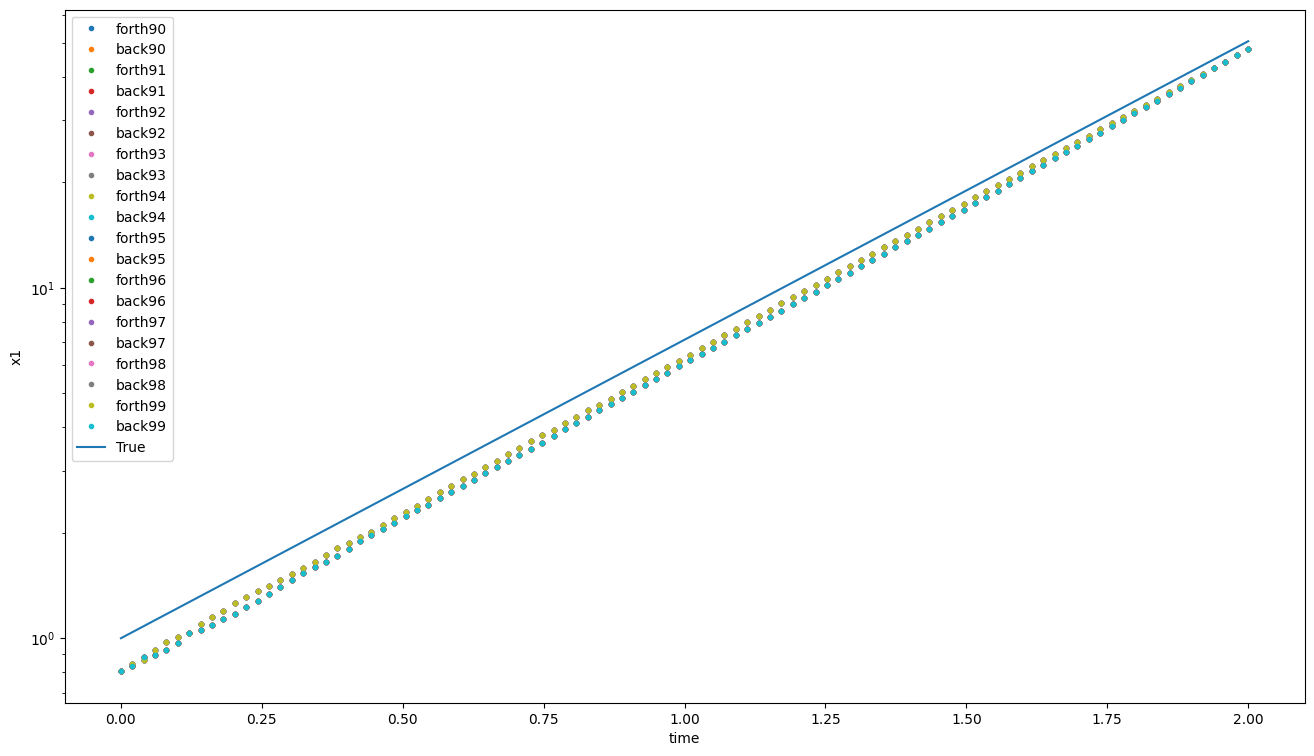

In [16]:
plt.figure(figsize=(16,9))
for it in range(90,100):
    plt.semilogy(t, store_for[it][:,0], ".", label= f"forth{it}")
    plt.semilogy(t, store_back[it][:,0], ".", label= f"back{it}")
plt.semilogy(t, xtrue[:,0], "-", label="True")
plt.xlabel("time"); plt.ylabel("x1")

plt.legend()

[ 0.03921339 -0.01423477]
<class 'numpy.matrix'>
[ 0.04079776 -0.01452234]
<class 'numpy.matrix'>
[ 0.04244616 -0.01481572]
<class 'numpy.matrix'>
[ 0.04416116 -0.01511503]
<class 'numpy.matrix'>
[ 0.04594544 -0.01542039]
<class 'numpy.matrix'>
[ 0.04780183 -0.01573191]
<class 'numpy.matrix'>
[ 0.04973321 -0.01604972]
<class 'numpy.matrix'>
[ 0.05174264 -0.01637396]
<class 'numpy.matrix'>
[ 0.05383325 -0.01670475]
<class 'numpy.matrix'>
[ 0.05600833 -0.01704222]
<class 'numpy.matrix'>
[ 0.05827129 -0.01738651]
<class 'numpy.matrix'>
[ 0.06062569 -0.01773775]
<class 'numpy.matrix'>
[ 0.06307521 -0.01809609]
<class 'numpy.matrix'>
[ 0.0656237  -0.01846166]
<class 'numpy.matrix'>
[ 0.06827517 -0.01883463]
<class 'numpy.matrix'>
[ 0.07103376 -0.01921512]
<class 'numpy.matrix'>
[ 0.07390381 -0.01960331]
<class 'numpy.matrix'>
[ 0.07688982 -0.01999934]
<class 'numpy.matrix'>
[ 0.07999648 -0.02040336]
<class 'numpy.matrix'>
[ 0.08322866 -0.02081555]
<class 'numpy.matrix'>
[ 0.08659144 -0.0212

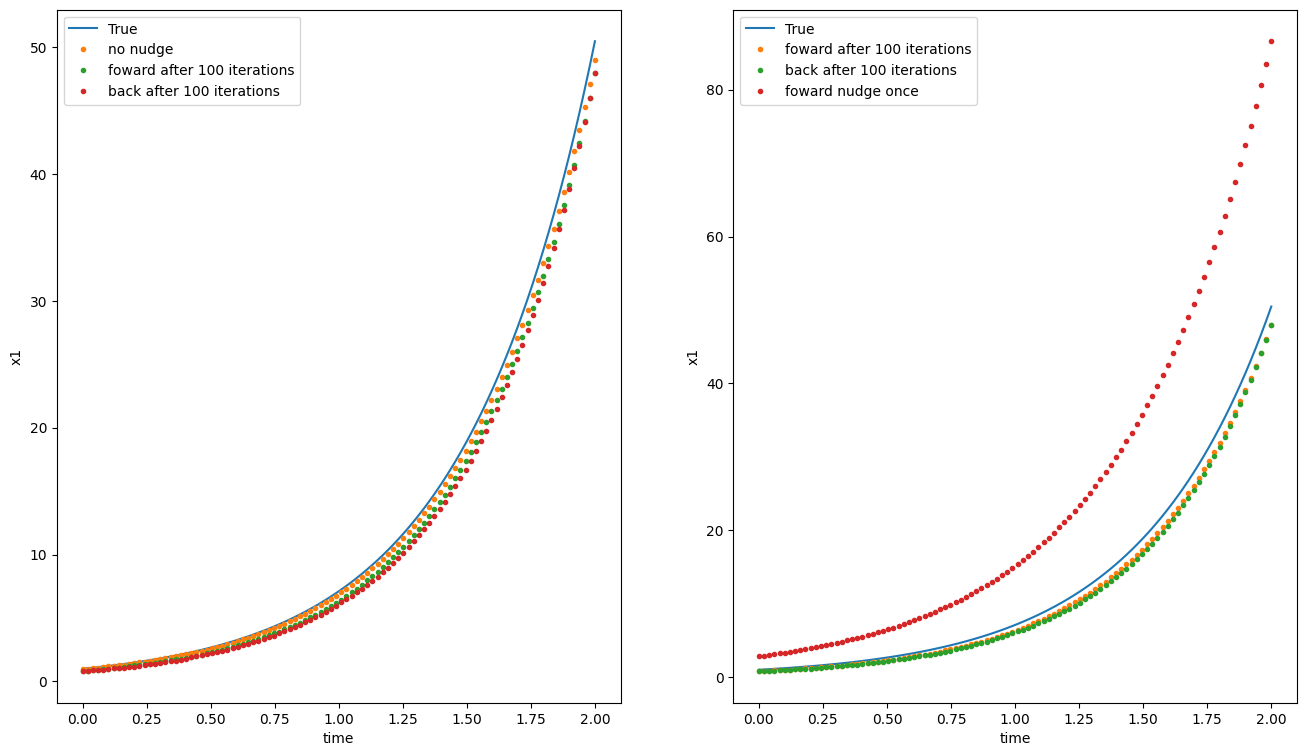

In [17]:
x_nonudge= generate_true(y_obs[0], t, pars)
plt.figure(figsize=(16,9))
# for it in range(5):
plt.subplot(1,2,1)
it=-1
plt.plot(t, xtrue[:,0], "-", label="True")
plt.plot(t, x_nonudge[:,0], ".", label="no nudge")
plt.plot(t, store_for[it][:,0], ".", label= f"foward after 100 iterations")
plt.plot(t, store_back[it][:,0], ".", label= f"back after 100 iterations")

# plt.plot(t, store_for[1][:,0], ".", label= f"foward nudge once")
plt.xlabel("time"); plt.ylabel("x1")

plt.legend()

plt.subplot(1,2,2)
it=-1
plt.plot(t, xtrue[:,0], "-", label="True")
# plt.plot(t, x_nonudge[:,0], ".", label="no nudge")
plt.plot(t, store_for[it][:,0], ".", label= f"foward after 100 iterations")
plt.plot(t, store_back[it][:,0], ".", label= f"back after 100 iterations")

plt.plot(t, store_for[1][:,0], ".", label= f"foward nudge once")
plt.xlabel("time"); plt.ylabel("x1")

plt.legend()

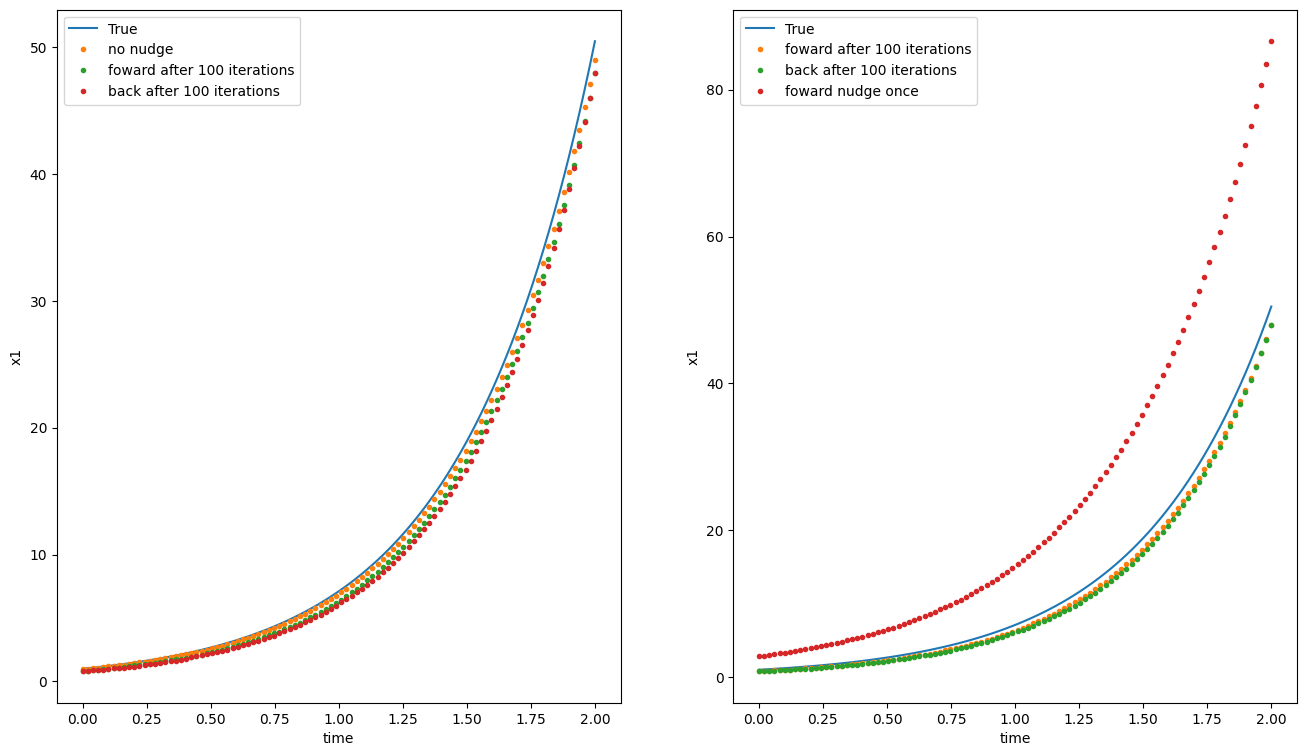

In [14]:
K, K_back= 0.5,0.5
store_for, store_back=  back_forth_nudge(pars, t, K, K_back, H, y_obs, 1000)
plt.figure(figsize=(16,9))
# for it in range(5):
plt.subplot(1,2,1)
it=-1
plt.plot(t, xtrue[:,0], "-", label="True")
plt.plot(t, x_nonudge[:,0], ".", label="no nudge")
plt.plot(t, store_for[it][:,0], ".", label= f"foward after 100 iterations")
plt.plot(t, store_back[it][:,0], ".", label= f"back after 100 iterations")

# plt.plot(t, store_for[1][:,0], ".", label= f"foward nudge once")
plt.xlabel("time"); plt.ylabel("x1")

plt.legend()

plt.subplot(1,2,2)
it=-1
plt.plot(t, xtrue[:,0], "-", label="True")
# plt.plot(t, x_nonudge[:,0], ".", label="no nudge")
plt.plot(t, store_for[it][:,0], ".", label= f"foward after 100 iterations")
plt.plot(t, store_back[it][:,0], ".", label= f"back after 100 iterations")

plt.plot(t, store_for[1][:,0], ".", label= f"foward nudge once")
plt.xlabel("time"); plt.ylabel("x1")

plt.legend()